# Team Mango Components Three

## Author: Yikai Deng


Yikai defined a function of returning statistical results and histogram figure with distribution of quantitative columns. 
For categorical column, he made a function to return a pie chart with different proportions of different categories. 
Besides, he defined another function to make a scatter plot based on its latitude and longitude columns.

In [22]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import csv
import seaborn as sns
from collections import Counter
import ipywidgets
from pylab import *
import scipy.stats as stats

In [2]:
data = {}
with open("C://Users//hasee//Desktop//DV//sample_flat.csv", "r") as f:
    reader = csv.reader(f)
    header = next(reader)
    for k in header:
        data[k] = []
    for row in reader:
        for k, v in zip(header, row):
            data[k].append(v)

In [3]:
header

['names',
 'dates',
 'latitude',
 'longitude',
 'categorical',
 'quant1',
 'quant2',
 'quant3']

In [29]:
class Dataset:
    def __init__(self, data):
        self.data = data
        
    def convert(self, column, dtype):
        self.data[column] = np.array(self.data[column], dtype=dtype)
        
    def columns(self):
        return self.data.keys()
    
    def filter_eq(self, column, value):
        good = (self.data[column] == value)
        new_data = {}
        for column in self.data:
            new_data[column] = self.data[column][good]
        return Dataset(new_data)
    
    def filter_lt(self, column, value):
        good = (self.data[column] < value)
        new_data = {}
        for column in self.data:
            new_data[column] = self.data[column][good]
        return Dataset(new_data)
    
    def filter_gt(self, column, value):
        good = (self.data[column] > value)
        new_data = {}
        for column in self.data:
            new_data[column] = self.data[column][good]
        return Dataset(new_data)
    
    def filter_ne(self, column, value):
        good = (self.data[column] != value)
        new_data = {}
        for column in self.data:
            new_data[column] = self.data[column][good]
        return Dataset(new_data)
    
    def size(self):
        for key in self.data:
            return self.data[key].size

    def split(self, column):
        new_datasets = {}
        for split_value in np.unique(self.data[column]):
            new_datasets[split_value] = self.filter_eq(column, split_value)
        return new_datasets

    def stats(self):
        statistics = {}
        for key in self.data:
            if self.data[key].dtype not in ("float", "int"):
                continue
            values = self.data[key]
            statistics[key] = (values.min(), values.max(), values.std(), values.mean())
        return statistics
    
    def compare(self, other):
        stats1 = self.stats()
        stats2 = other.stats()
        for column in self.columns():
            if column not in stats1: continue
            print("Column '{0:25s}'".format(column))
            for s1, s2 in zip(stats1[column], stats2[column]):
                print("    {0} vs {1}".format(s1, s2))
    
    def plot_loc(self, x_column, y_column):
        plt.plot(self.data[x_column], self.data[y_column],'.')
    
    def plot_category(self, x_column):
        c=Counter(self.data[x_column])
        values=[]
        for item in c.values():
            values.append(float(item))
        keys=c.keys()
        pie(values, labels=keys,
                autopct='%1.1f%%', shadow=True, startangle=90)
        
    def plot_distplot(self, x_column):
        sns.set(color_codes=True)
        sns.distplot(self.data[x_column])

In [30]:
d = Dataset(data)

In [31]:
value_types = {'names':'str',
               'dates':'str',
               'latitude':'float',
               'longitude':'float',
               'categorical':'str',
               'quant1':'float',
               'quant2':'float',
               'quant3':'float'}

In [32]:
for key in d.columns():
    d.convert(key, value_types.get(key,'str'))

In [8]:
d.size()

10000

In [9]:
d.columns()

dict_keys(['quant2', 'longitude', 'dates', 'categorical', 'latitude', 'quant1', 'quant3', 'names'])

In [10]:
stats1=d.stats()
stats1

{'latitude': (-89.995630520000006,
  89.974703180000006,
  51.542993056366846,
  1.0263208923654998),
 'longitude': (-179.75694519999999,
  179.9466961,
  103.54112173893526,
  -0.082380171754900033),
 'quant1': (0.0013558789999999999,
  3.4998131209999999,
  1.0121408919091974,
  1.7370771337032003),
 'quant2': (-29.97977745,
  29.99403496,
  17.455537811363982,
  0.031579569049699996),
 'quant3': (0.72358315500000003,
  9999.3764539999993,
  2889.2689776495827,
  4980.3334926302578)}

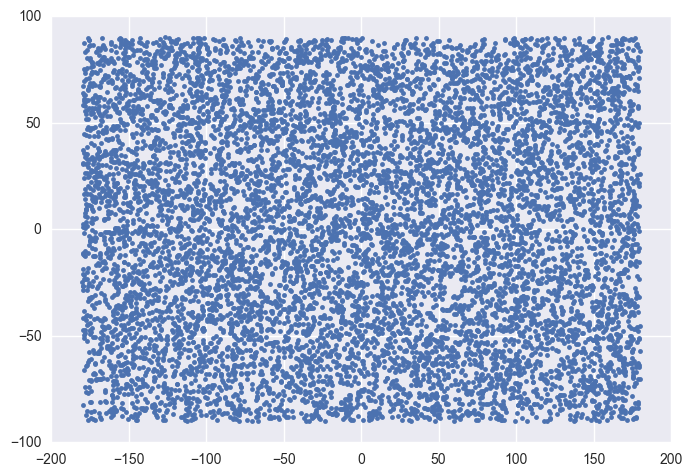

In [11]:
d.plot_loc('longitude','latitude')

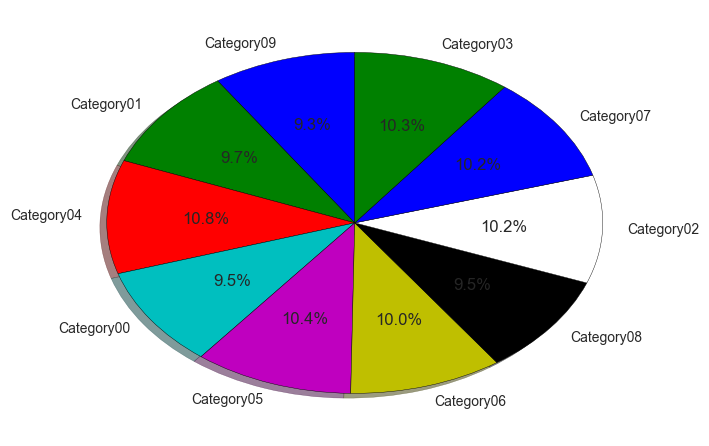

In [12]:
d.plot_category('categorical')

C:\Users\hasee\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


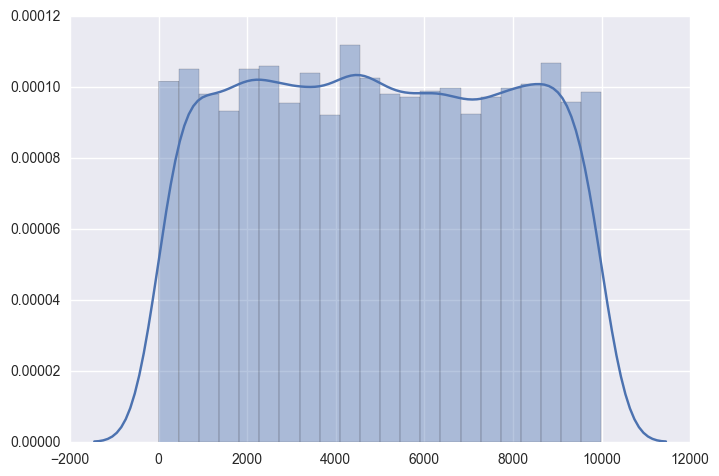

In [34]:
d.plot_distplot('quant3')

[("b'Nechuma'", 3),
 ("b'Mayrin'", 3),
 ("b'Jorrin'", 3),
 ("b'Annalise'", 3),
 ("b'Jamilia'", 3)]